In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()


#importing train test split
from sklearn.model_selection import train_test_split

## Using the dataset from kaggle for indians diabetes

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Lets see the rows and columns of our dataset 


In [ ]:
# From our dataset above these features are very important for modelling our recommendation system 
# and our prediction because we are going to be using KNN for our modeling purpose 

In [4]:
diabetes_df.shape

(768, 9)

In [5]:
# Lets see our class distribution of the datataset target of Outcome as the case maybe 
diabetes_df.Outcome.value_counts() / len(diabetes_df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Lets assign variables to our features 

In [6]:
# First i like to create a checker by copiying our dataset 
diabetes = diabetes_df.copy()

In [7]:
# here now the outcome which is our target is saved in y and the rest of the dstaframe is saved in x 
x = diabetes.drop('Outcome', axis = 'columns').values
y = diabetes['Outcome'].values

## Scaling our data 

In [8]:
#We have to scale our dataset because it is not uniform, to do this we use
import sklearn.preprocessing as preproc
X_scaled = preproc.StandardScaler().fit_transform(x)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Dividing our Dataset 

In [9]:
## Time to divided our data into Train test split with the sklearn traintest split module 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

## Importing KNN Classifier 

### we will be using diffrent values of K to give us the best value for predicting our model 

#### we will be using k(1 - 50)

In [16]:
# import KNN classifier 
from sklearn.neighbors import KNeighborsClassifier

# Lets create K neighors (1 - 10), and create Arrays to store Train/Test performance accuracy 
k = np.arange(1,50)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))


for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(X_train, y_train)
    
    # Evaluate train performance 
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Evaluate test performance
    test_accuracy[i] = knn.score(X_test, y_test) 

## Visualizing our Train / Test Report 

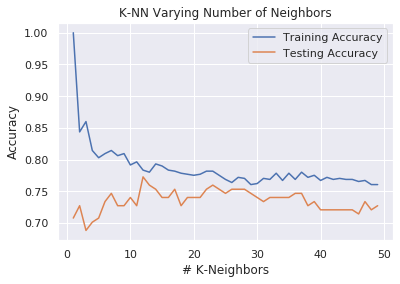

In [17]:
#Lets visualize the train / test performance
k = np.arange(1, 50)
plt.title('K-NN Varying Number of Neighbors')
plt.plot(k, train_accuracy, label = 'Training Accuracy')
plt.plot(k, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('# K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Apply GridSearchCV 

### its hard to see which value of k has the best prediction accuracy 
### so therefore we will apply GridSearchCV to it 
### where for each value of K we will apply 5-Fold Cross Validation to it
### Specifically:

### 1. Try diffrent values of k
### 2. Train/fit them all seperately 
### 3. Evaluate each of their performance
### 4. Select the best score


In [18]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1, 50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_scaled, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
# prediction accuray:
knn_cv.best_score_

0.7669270833333334

## Checking the Best K value 

In [20]:
knn_cv.best_params_

{'n_neighbors': 17}